In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [17]:
df = pd.read_csv("data/raw/Media-Matrix-Combined-v2.csv")

In [19]:
df.nunique()

Compound      62
PubChemCID    62
1_YAR         18
2a_YAR        19
2b_YAR        19
2c_YAR        19
2d_YAR        19
3a_YAR        16
3b_YAR        10
3c_YAR        23
4_YAR         18
5_YAR         18
1_CER         15
2_CER         17
3_CER         21
4_CER         17
5a_CER        28
5b_CER        27
1a_PIC        16
1b_PIC        14
1c_PIC        15
1d_PIC        15
2a_PIC        14
3a_PIC        16
3b_PIC        13
4a_PIC         7
4b_PIC         9
dtype: int64

In [ ]:
# remove pubchemid column
df = df.drop(df.columns[1], axis=1)

# set index to compound names
df.set_index(df.columns[0], inplace=True)

                                         1_YAR  2a_YAR  2b_YAR  2c_YAR  \
Compound                                                                 
Ammonium iron (II) sulphate hexahydrate   0.00     0.0     0.0     0.0   
Ammonium phosphate                        0.00     0.0     0.0     0.0   
Ammonium sulphate                         3.77     5.0     5.0     5.0   
Arginine                                  0.00     0.0     0.0     0.0   
Aspartic acid                             0.00     0.0     0.0     0.0   

                                         2d_YAR  3a_YAR  3b_YAR  3c_YAR  \
Compound                                                                  
Ammonium iron (II) sulphate hexahydrate     0.0     0.0     0.0     0.0   
Ammonium phosphate                          0.0     0.0     0.0     0.0   
Ammonium sulphate                           5.0     0.0     4.0     4.5   
Arginine                                    0.0     0.0     0.0     0.0   
Aspartic acid                  

In [41]:
df.describe()

,1_YAR,2a_YAR,2b_YAR,2c_YAR,2d_YAR,3a_YAR,3b_YAR,3c_YAR,4_YAR,5_YAR,...,5b_CER,1a_PIC,1b_PIC,1c_PIC,1d_PIC,2a_PIC,3a_PIC,3b_PIC,4a_PIC,4b_PIC
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.550854,0.460438,0.460438,0.863663,0.460438,0.383082,0.734142,0.874496,1.428868,0.869441,...,1.277367,0.421582,0.421861,0.760160,0.219480,1.974876,0.460597,11.841701,1.473548,1.136774
std,2.120593,2.627429,2.627429,5.744568,1.903863,2.548492,3.236155,3.175141,10.168796,5.189484,...,7.782533,1.627032,1.627525,3.456583,1.018536,12.253811,2.627402,92.702140,6.742219,5.934587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000172,0.000375,0.000375,0.000375,0.000475,0.000000,0.000000,0.000004,0.000750,0.000752,...,0.003531,0.000650,0.000000,0.000000,0.000000,0.000000,0.000300,0.000000,0.000000,0.000000
max,12.930000,20.000000,20.000000,45.000000,10.000000,20.000000,20.000000,20.000000,80.000000,40.000000,...,60.000000,10.000000,10.000000,22.695000,7.230000,95.200000,20.000000,730.000000,45.200000,45.200000


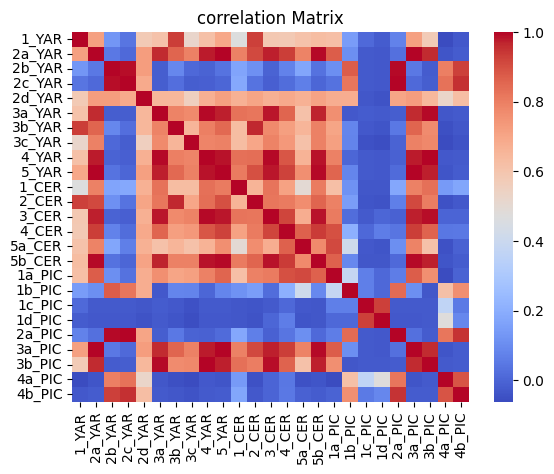

In [21]:


sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("correlation Matrix")
plt.show()

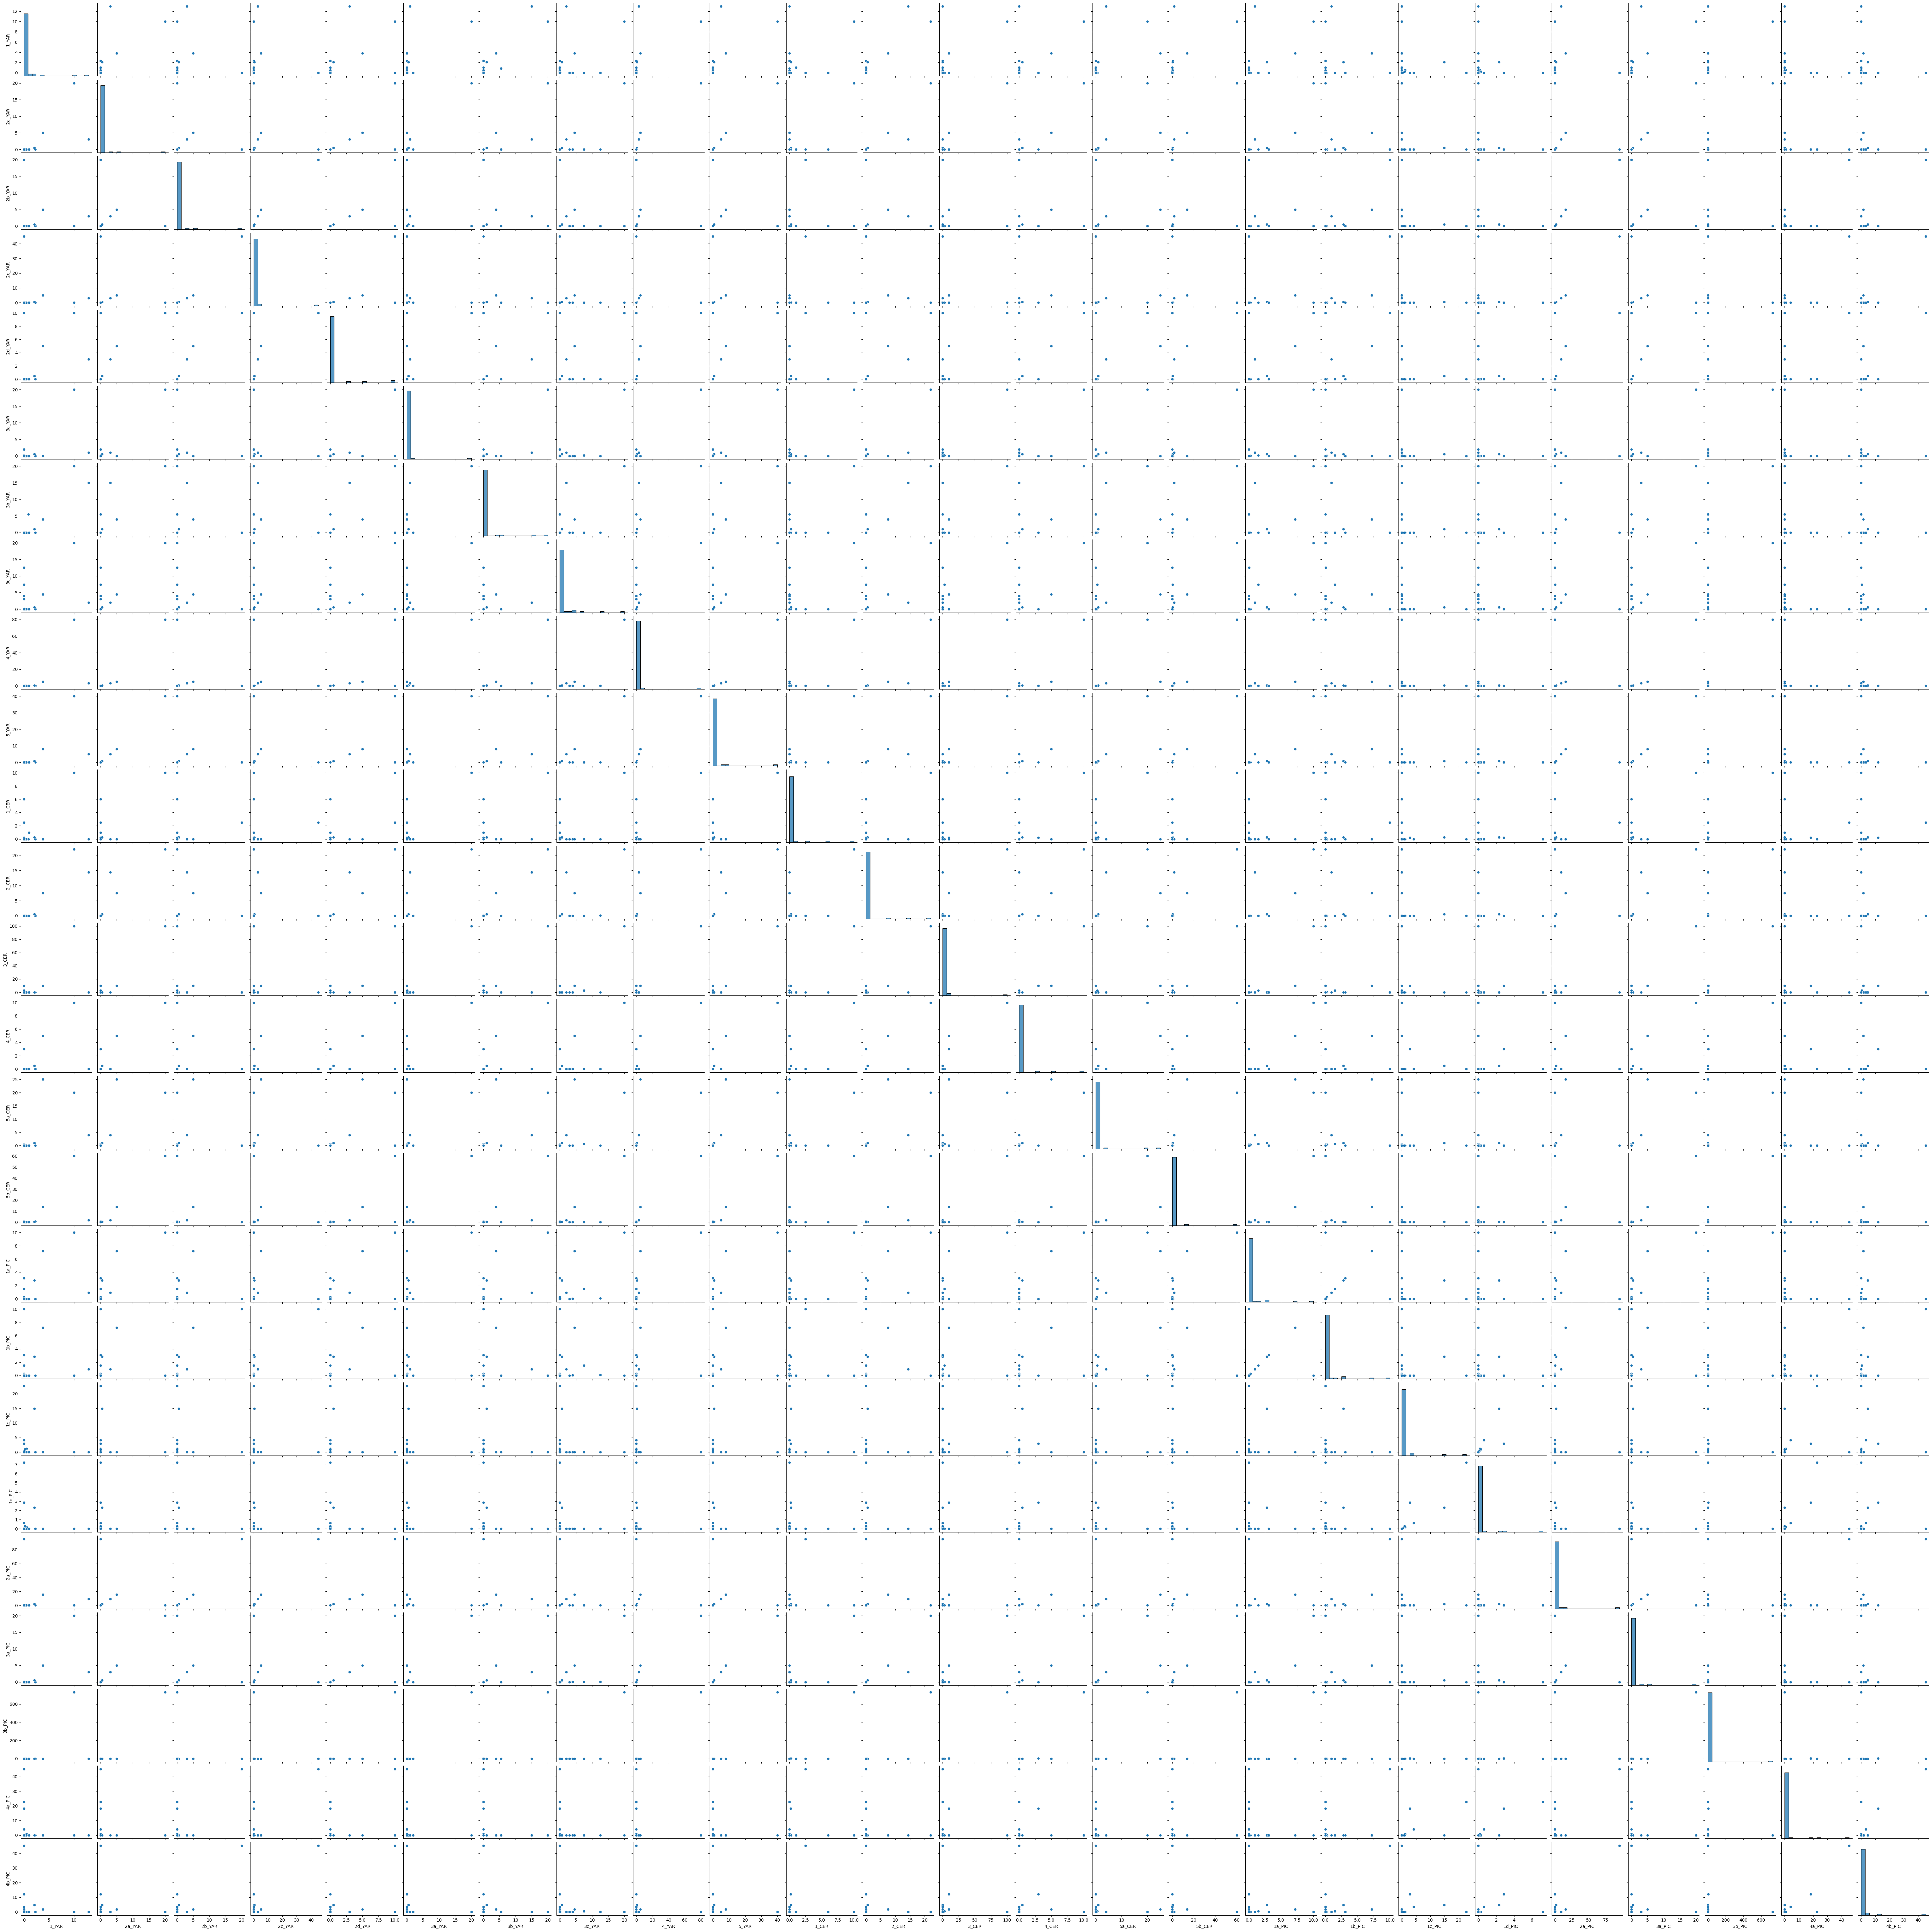

In [22]:
sns.pairplot(df)

In [23]:
print(scipy.__version__)

1.15.3


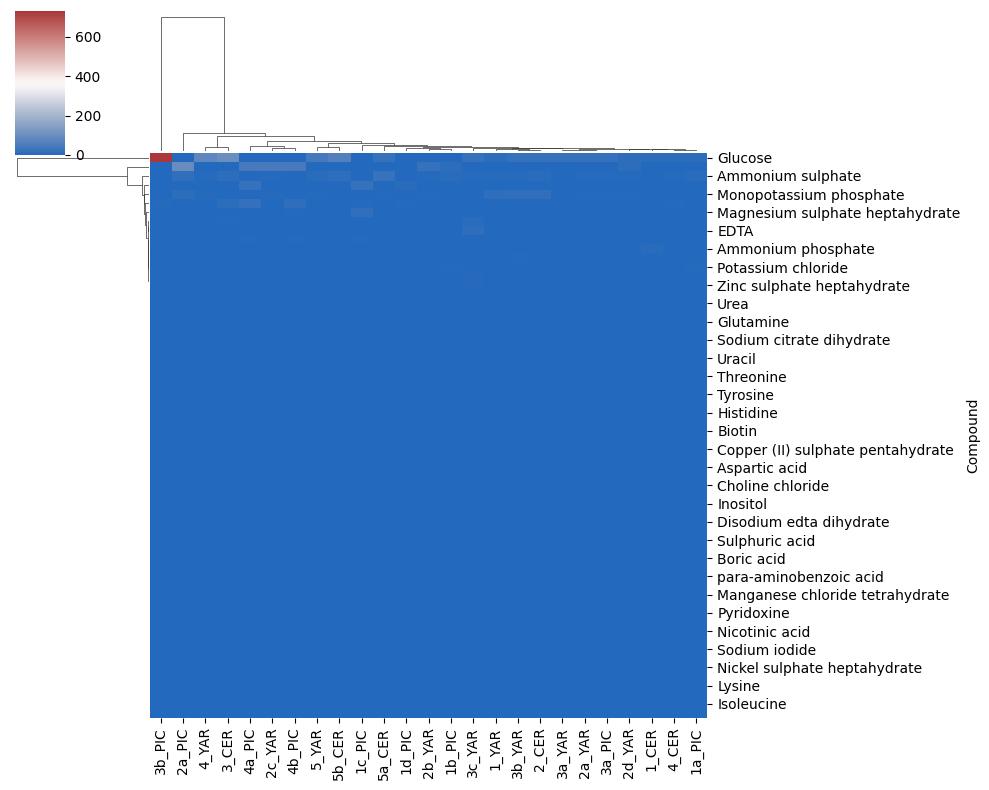

In [24]:
sns.clustermap(df, cmap='vlag', metric='euclidean', figsize=(10, 8))


In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), 
                         columns=df.columns,
                         index=df.index)


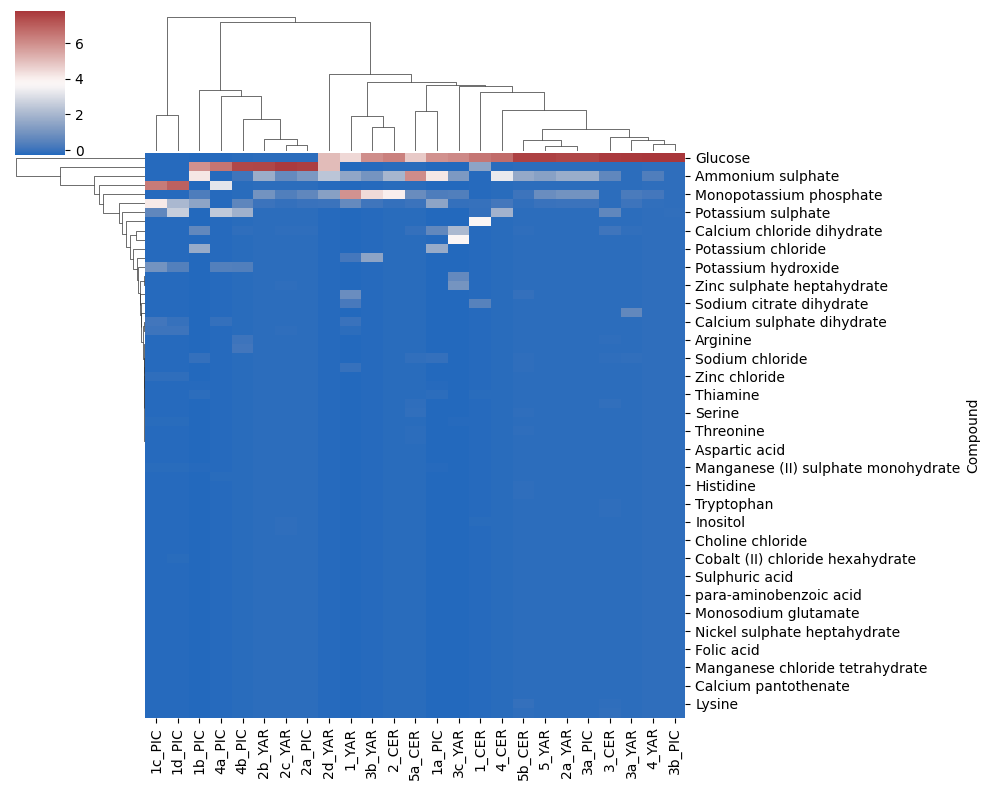

In [26]:
sns.clustermap(df_scaled, cmap='vlag', metric='euclidean', figsize=(10, 8))

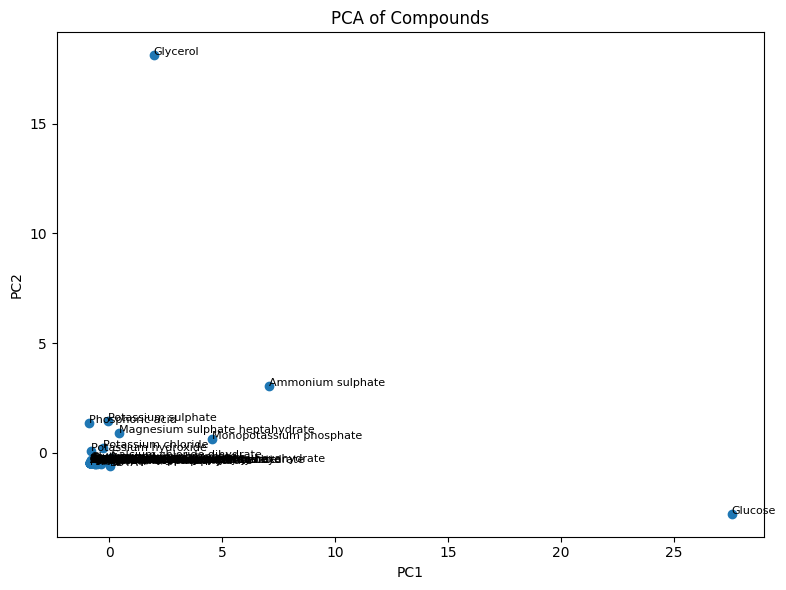

In [27]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title("PCA of Compounds")
plt.xlabel("PC1")
plt.ylabel("PC2")

# Optional: annotate with compound names
for i, name in enumerate(df_scaled.index):
    plt.text(pca_result[i, 0], pca_result[i, 1], str(name), fontsize=8)

plt.tight_layout()
plt.show()


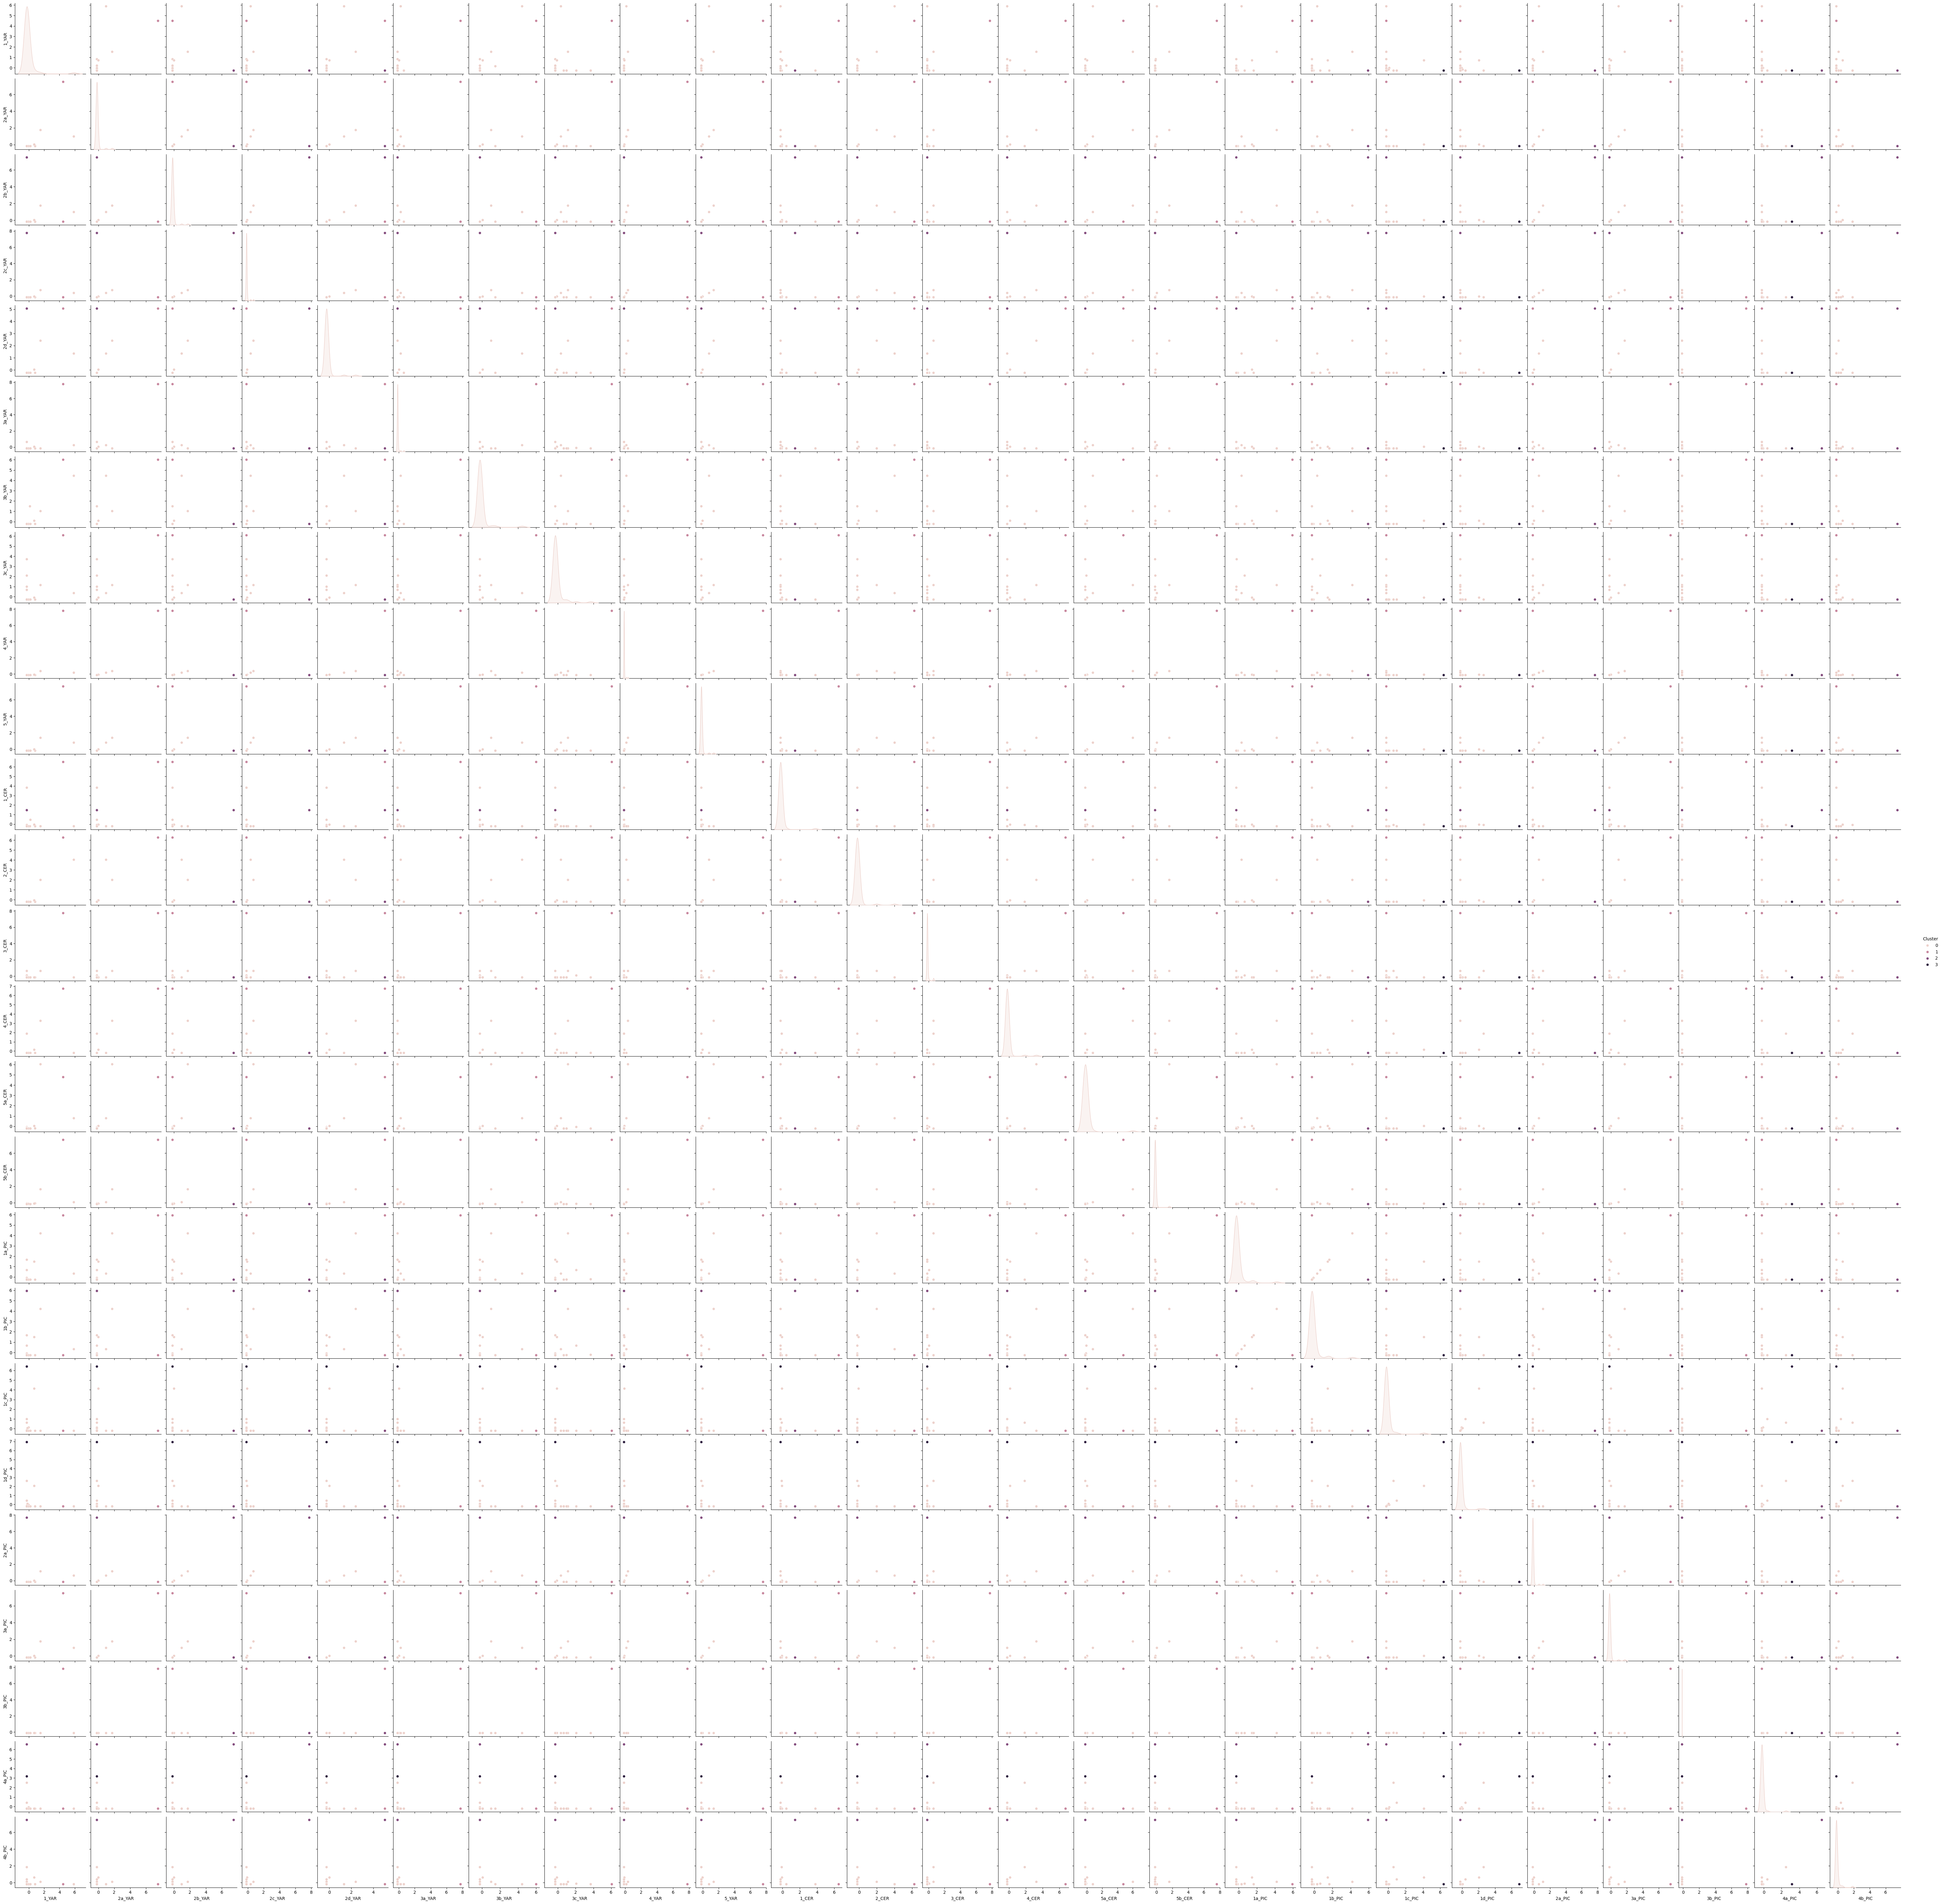

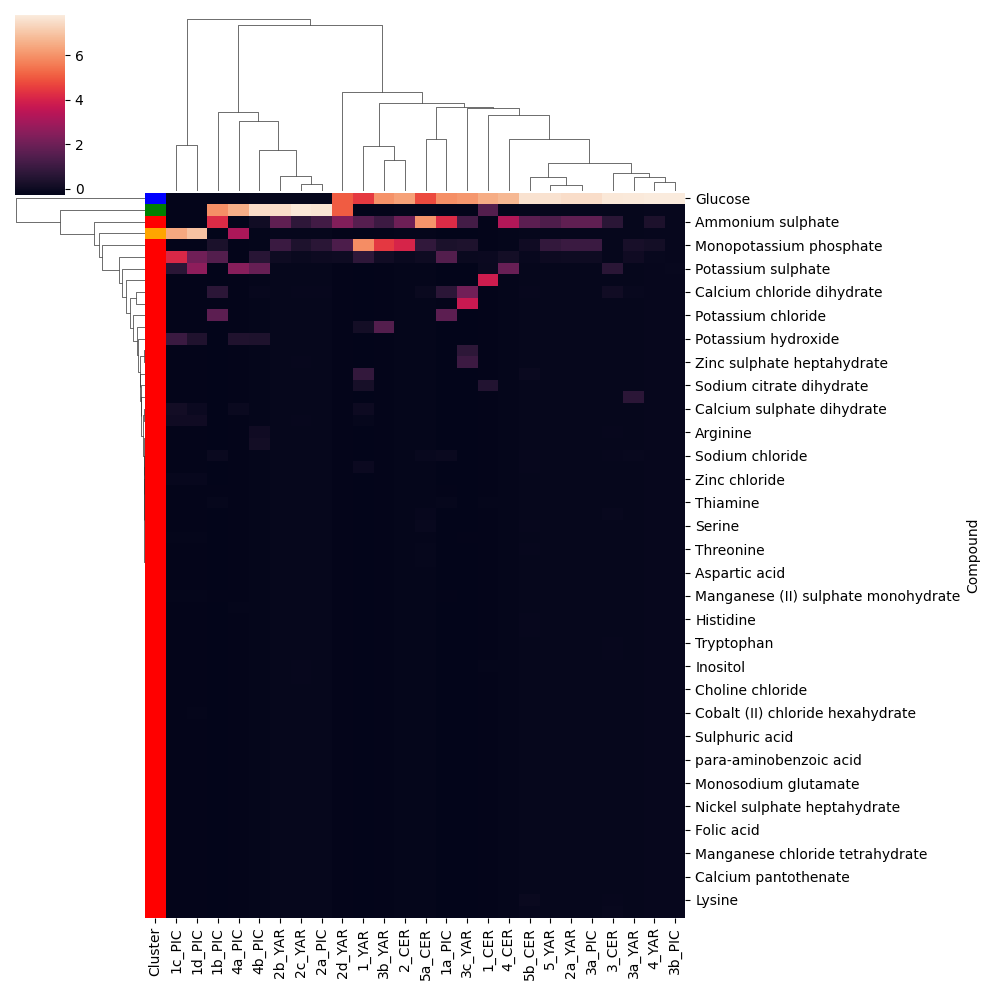

In [29]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0)  # Try 3–6
labels = kmeans.fit_predict(df_scaled)

# Add to your dataframe
df_scaled['Cluster'] = labels
import seaborn as sns
sns.pairplot(df_scaled, hue='Cluster')
sns.clustermap(df_scaled.drop('Cluster', axis=1), row_colors=df_scaled['Cluster'].map({0: 'red', 1: 'blue', 2: 'green', 3: 'orange'}))


In [30]:
df_scaled.groupby('Cluster').mean()

,1_YAR,2a_YAR,2b_YAR,2c_YAR,2d_YAR,3a_YAR,3b_YAR,3c_YAR,4_YAR,5_YAR,...,5b_CER,1a_PIC,1b_PIC,1c_PIC,1d_PIC,2a_PIC,3a_PIC,3b_PIC,4a_PIC,4b_PIC
Cluster,,,,,,,,,,,,,,,,,,,,,
0,-0.067263,-0.121087,-0.121087,-0.126148,-0.167106,-0.126393,-0.093975,-0.093514,-0.127228,-0.123120,...,-0.123324,-0.091740,-0.091703,-0.100919,-0.110248,-0.124491,-0.121085,-0.128011,-0.160882,-0.120325
1,4.492273,7.497471,-0.176673,-0.151572,5.051539,7.760298,6.001917,6.072685,7.789766,7.601912,...,7.607036,5.935107,-0.261320,-0.221712,-0.217245,-0.162480,7.497487,7.810186,-0.220340,-0.193114
2,-0.261885,-0.176673,7.497471,7.745863,5.051539,-0.151544,-0.228708,-0.277668,-0.141662,-0.168907,...,-0.165472,-0.261226,5.933138,-0.221712,-0.217245,7.669953,-0.176736,-0.128782,6.538413,7.485430
3,-0.261885,-0.176673,-0.176673,-0.151572,-0.243818,-0.151544,-0.228708,-0.277668,-0.141662,-0.168907,...,-0.165472,-0.261226,-0.261320,6.397619,6.939124,-0.162480,-0.176736,-0.128782,3.173989,-0.193114


In [31]:
compound_clusters = df_scaled['Cluster']
compound_clusters.value_counts()


Cluster
0    59
1     1
2     1
3     1
Name: count, dtype: int64

In [32]:
compounds_by_cluster = df.copy()
compounds_by_cluster['Cluster'] = compound_clusters


<Axes: title={'center': 'Mean Response per Condition by Cluster'}>

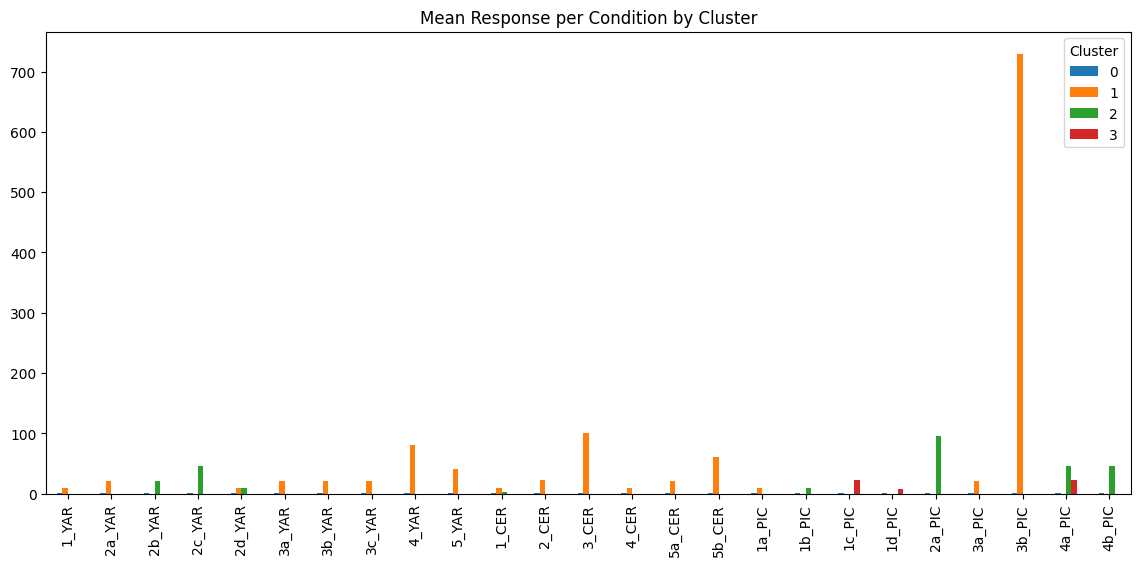

In [33]:
cluster_means = compounds_by_cluster.groupby('Cluster').mean()
cluster_means.T.plot(kind='bar', figsize=(14, 6), title="Mean Response per Condition by Cluster")


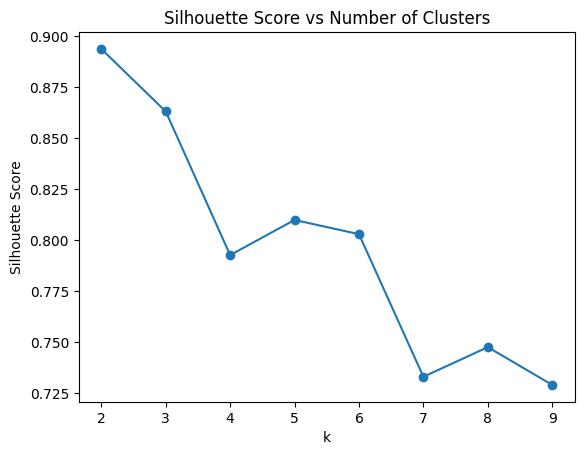

In [34]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(df_scaled.drop('Cluster', axis=1))
    score = silhouette_score(df_scaled.drop('Cluster', axis=1), labels)
    scores.append(score)

plt.plot(range(2, 10), scores, marker='o')
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.show()


In [35]:
outliers = df_scaled[df_scaled['Cluster'] != 0]
print(outliers.index)


Index(['Glucose', 'Glycerol', 'Phosphoric acid'], dtype='object', name='Compound')


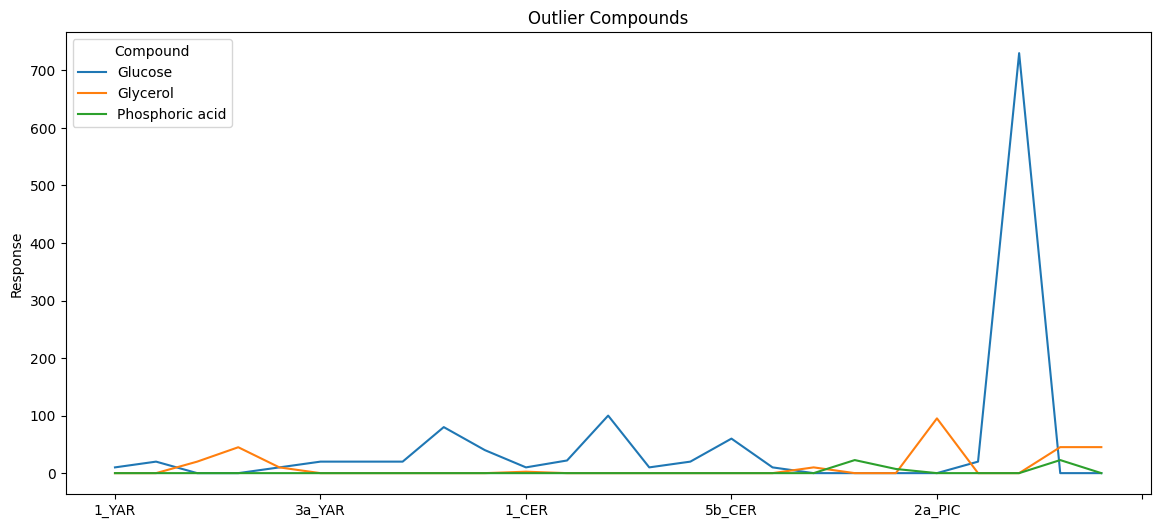

In [37]:
import matplotlib.pyplot as plt

# Plot the outlier compounds
df.loc[outliers.index].T.plot(figsize=(14, 6), title="Outlier Compounds", legend=True)
plt.ylabel("Response")
plt.show()


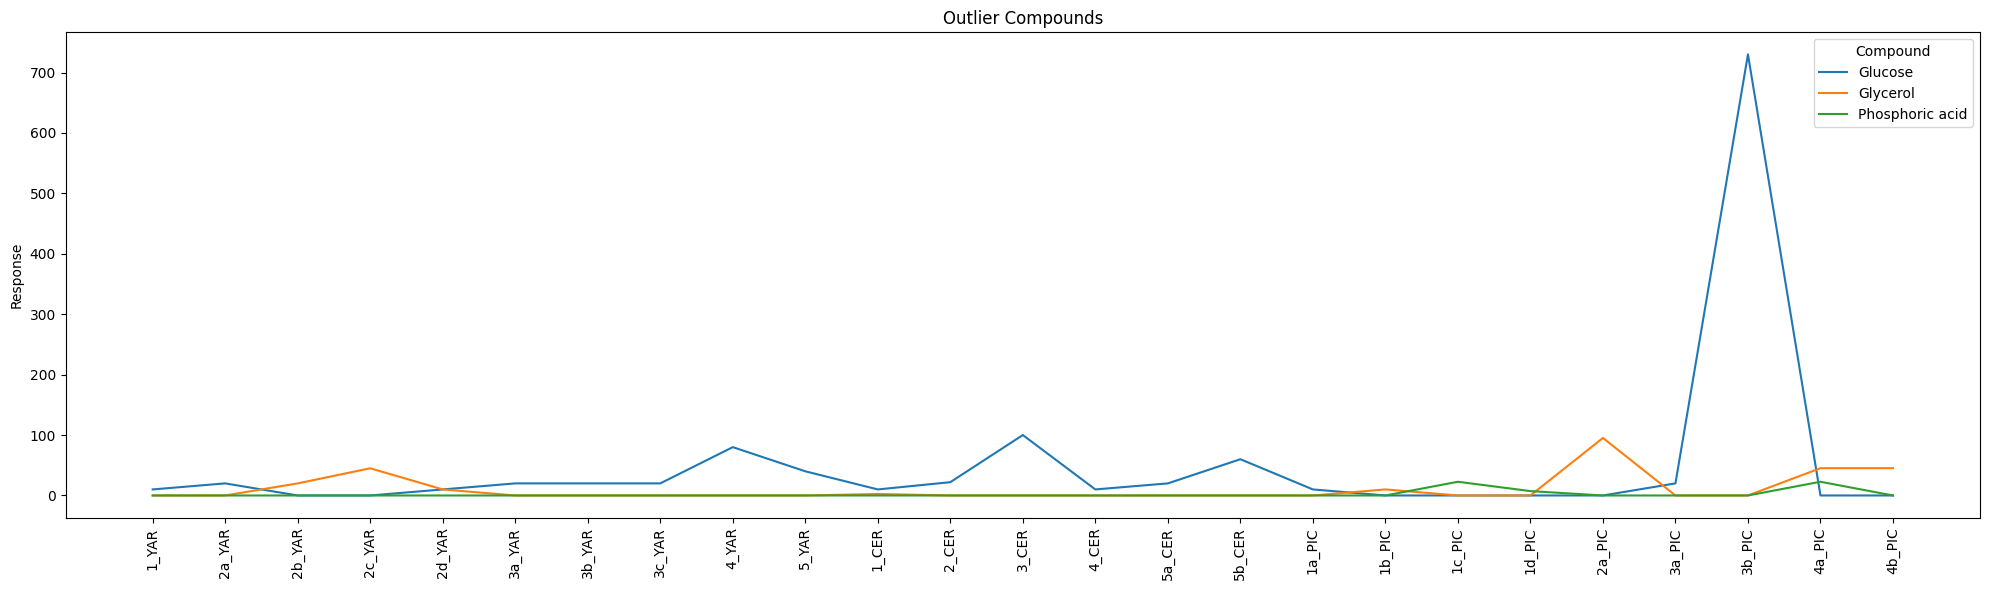

In [39]:
ax = df.loc[outliers.index].T.plot(figsize=(20, 6), title="Outlier Compounds", legend=True)

# Ensure every point is labeled on the x-axis
ax.set_xticks(range(len(df.columns)))
ax.set_xticklabels(df.columns, rotation=90)

plt.ylabel("Response")
plt.tight_layout()
plt.show()


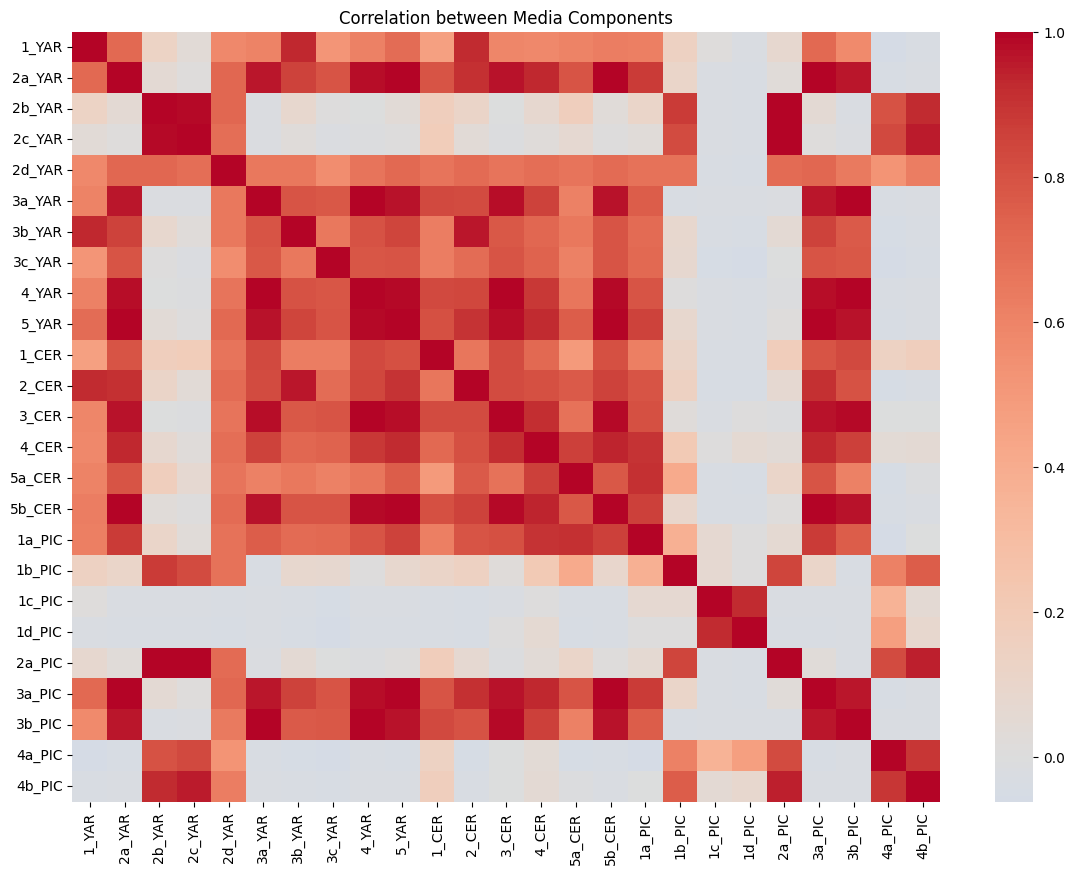

In [ ]:


plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), cmap='coolwarm', center=0, annot=False)
plt.title("Correlation between Experiments")
plt.show()


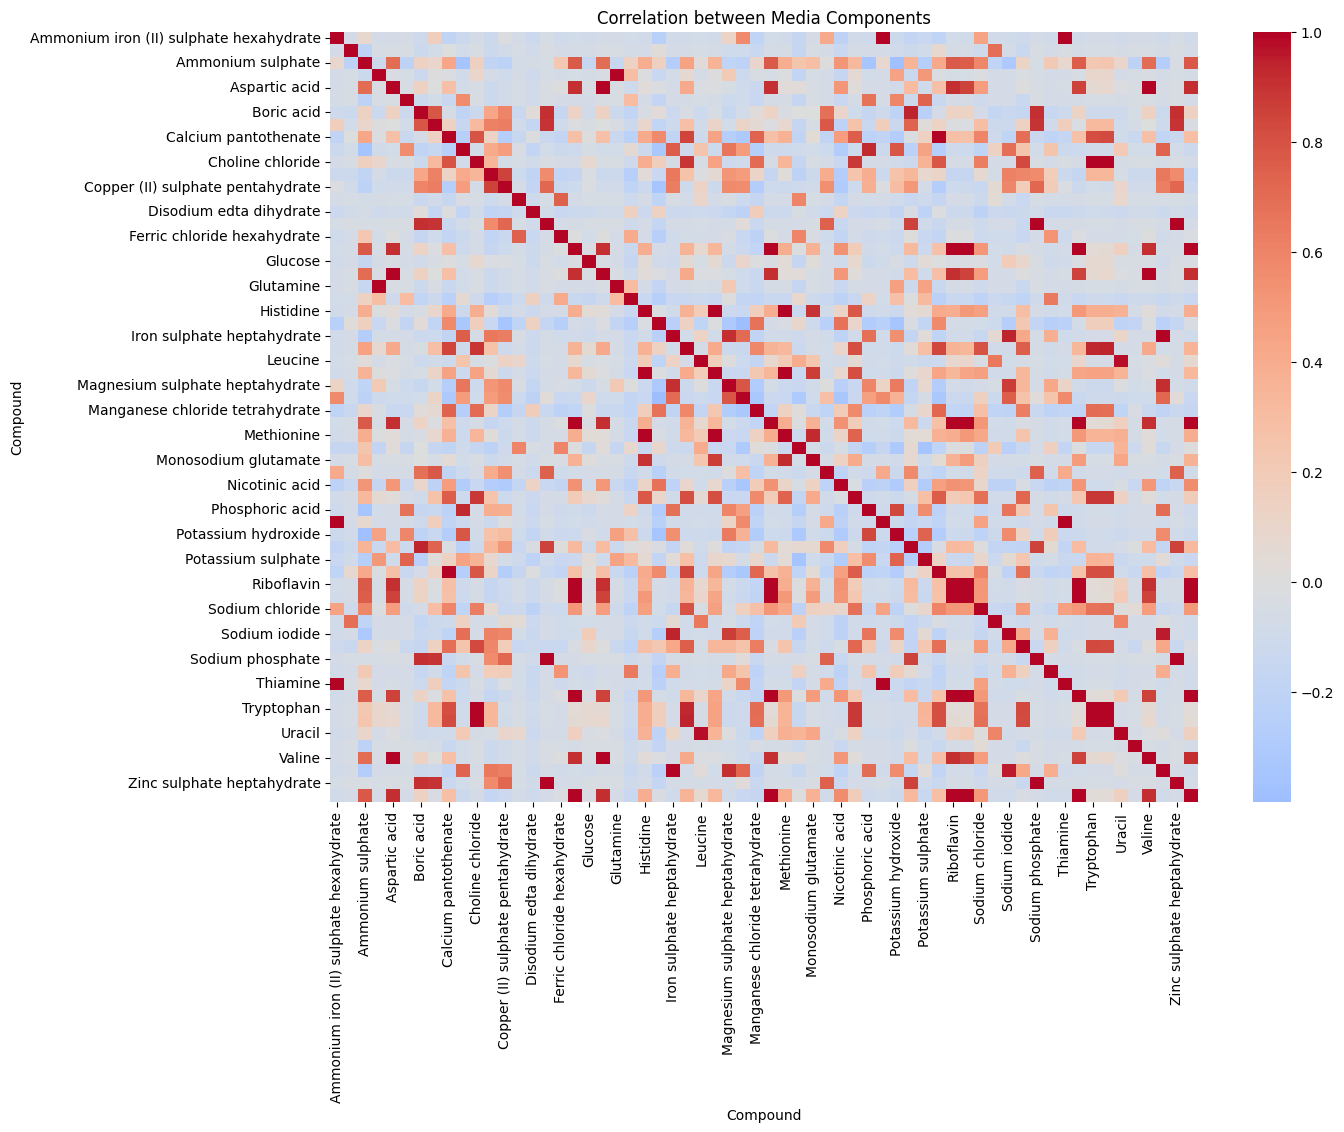

In [45]:
df_t = df.T

plt.figure(figsize=(14, 10))
sns.heatmap(df_t.corr(), cmap='coolwarm', center=0, annot=False)
plt.title("Correlation between Media Components")
plt.show()

In [47]:
import itertools

ratios = {}
cols = df_t.columns  # Now each column is a media component

for col1, col2 in itertools.combinations(cols, 2):
    ratio = df_t[col1] / df_t[col2]
    if ratio.isnull().all():  # avoid divide-by-zero columns
        continue
    std_dev = ratio.std()
    ratios[(col1, col2)] = std_dev


/Users/s/PhD/gitrepo/ML_for_rational_design/.venv/lib/python3.13/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


In [48]:
stable_ratios = sorted(ratios.items(), key=lambda x: x[1])
for (comp1, comp2), std in stable_ratios[:10]:
    print(f"{comp1} / {comp2} --> std dev: {std:.4f}")


Aspartic acid / Calcium chloride dihydrate --> std dev: 0.0395
Aspartic acid / Boric acid --> std dev: 12.1268
Ammonium iron (II) sulphate hexahydrate / Ammonium phosphate --> std dev: nan
Ammonium iron (II) sulphate hexahydrate / Ammonium sulphate --> std dev: 0.0029
Ammonium iron (II) sulphate hexahydrate / Arginine --> std dev: nan
Ammonium iron (II) sulphate hexahydrate / Aspartic acid --> std dev: nan
Ammonium iron (II) sulphate hexahydrate / Biotin --> std dev: 50.0068
Ammonium iron (II) sulphate hexahydrate / Boric acid --> std dev: nan
Ammonium iron (II) sulphate hexahydrate / Calcium chloride dihydrate --> std dev: 0.0144
Ammonium iron (II) sulphate hexahydrate / Calcium pantothenate --> std dev: nan


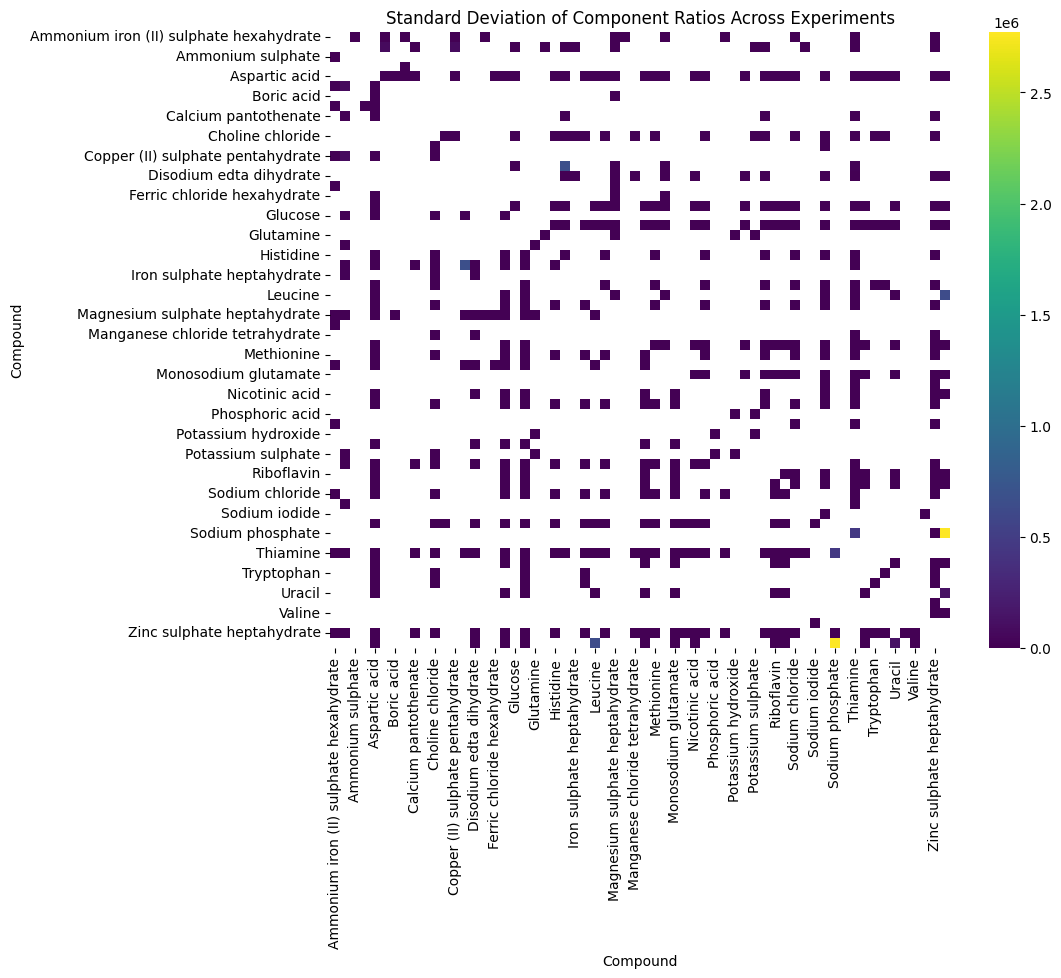

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert to square matrix
ratio_df = pd.DataFrame(index=cols, columns=cols, dtype=float)
for (col1, col2), std in ratios.items():
    ratio_df.loc[col1, col2] = std
    ratio_df.loc[col2, col1] = std  # symmetric

plt.figure(figsize=(10, 8))
sns.heatmap(ratio_df, cmap="viridis", annot=False)
plt.title("Standard Deviation of Component Ratios Across Experiments")
plt.show()


In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_t_scaled = pd.DataFrame(scaler.fit_transform(df_t), 
                           index=df_t.index, 
                           columns=df_t.columns)


In [51]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_t_scaled = pd.DataFrame(scaler.fit_transform(df_t), 
                           index=df_t.index, 
                           columns=df_t.columns)


In [53]:
import itertools
import numpy as np

ratios = {}
cols = df_t_scaled.columns

for col1, col2 in itertools.combinations(cols, 2):
    with np.errstate(divide='ignore', invalid='ignore'):
        ratio = df_t_scaled[col1] / df_t_scaled[col2]
        if ratio.isnull().all() or np.isinf(ratio).all():
            continue
        std_dev = ratio.replace([np.inf, -np.inf], np.nan).dropna().std()
        ratios[(col1, col2)] = std_dev

stable_ratios = sorted(ratios.items(), key=lambda x: x[1])


In [54]:
for (comp1, comp2), std in stable_ratios[:10]:
    print(f"{comp1} / {comp2} --> std dev: {std:.4f}")


Ammonium iron (II) sulphate hexahydrate / Calcium pantothenate --> std dev: 0.0000
Ammonium iron (II) sulphate hexahydrate / Calcium sulphate dihydrate --> std dev: 0.0000
Ammonium iron (II) sulphate hexahydrate / Choline chloride --> std dev: nan
Ammonium iron (II) sulphate hexahydrate / Folic acid --> std dev: 0.0000
Ammonium iron (II) sulphate hexahydrate / Cobalt (II) chloride hexahydrate --> std dev: 2.7596
Ammonium iron (II) sulphate hexahydrate / Calcium chloride dihydrate --> std dev: 1.6169
Ammonium iron (II) sulphate hexahydrate / Boric acid --> std dev: 2.9851
Ammonium iron (II) sulphate hexahydrate / Arginine --> std dev: 0.0000
Ammonium iron (II) sulphate hexahydrate / Aspartic acid --> std dev: nan
Ammonium iron (II) sulphate hexahydrate / Biotin --> std dev: 150.3963


In [55]:
df_filtered = df_t_scaled.loc[:, (df_t_scaled != 0).any()]


In [56]:
ratio = df_t_scaled[col1] / df_t_scaled[col2]
valid = ratio.replace([np.inf, -np.inf], np.nan).dropna()
if len(valid) >= 5:  # Only trust stable ratios with enough data points
    std_dev = valid.std()


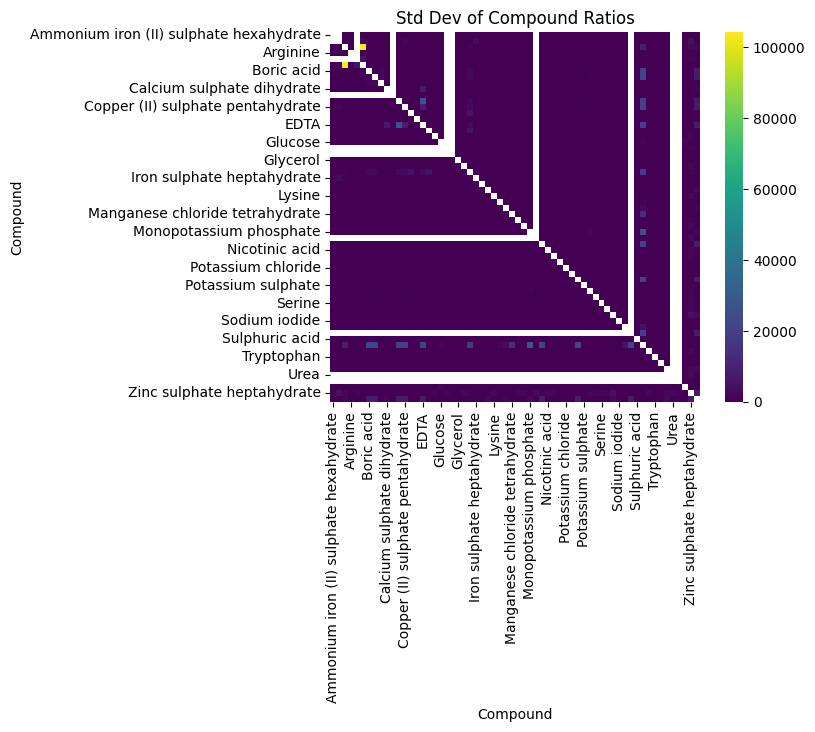

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

ratio_df = pd.DataFrame(index=cols, columns=cols, dtype=float)
for (col1, col2), std in ratios.items():
    ratio_df.loc[col1, col2] = std
    ratio_df.loc[col2, col1] = std  # fill symmetry

sns.heatmap(ratio_df, cmap="viridis", square=True)
plt.title("Std Dev of Compound Ratios")
plt.show()


In [58]:
compound_names = df_t_scaled.columns
n = len(compound_names)

# Initialize matrix
std_matrix = pd.DataFrame(np.nan, index=compound_names, columns=compound_names)

# Fill it
for i in range(n):
    for j in range(i+1, n):
        c1, c2 = compound_names[i], compound_names[j]
        ratio = df_t_scaled[c1] / df_t_scaled[c2]
        ratio = ratio.replace([np.inf, -np.inf], np.nan).dropna()
        if len(ratio) >= 5:
            std = ratio.std()
            std_matrix.loc[c1, c2] = std
            std_matrix.loc[c2, c1] = std  # symmetry


In [59]:
from sklearn.metrics import pairwise_distances

# Replace NaNs with high values (i.e., very dissimilar)
distance_matrix = std_matrix.fillna(std_matrix.max().max())
# Clip very large outliers if needed
distance_matrix = np.clip(distance_matrix, 0, 10)


In [61]:
from sklearn.cluster import AgglomerativeClustering

# You can adjust number of clusters or set a distance threshold
clustering = AgglomerativeClustering(
    metric='precomputed',
    linkage='average',
    distance_threshold=1.0,  # try tuning this
    n_clusters=None
)

labels = clustering.fit_predict(distance_matrix)

# Assign clusters to compounds
compound_clusters = pd.DataFrame({'Compound': compound_names, 'Cluster': labels})


In [62]:
# View clusters
for cluster_id, group in compound_clusters.groupby("Cluster"):
    print(f"Cluster {cluster_id}:")
    print(group["Compound"].tolist())
    print()

Cluster 0:
['Isoleucine', 'Sodium molybdate dihydrate']

Cluster 1:
['Biotin', 'Calcium chloride dihydrate', 'Cobalt (II) chloride hexahydrate', 'Ferric chloride hexahydrate']

Cluster 2:
['Ammonium iron (II) sulphate hexahydrate', 'Calcium pantothenate', 'Inositol']

Cluster 3:
['Choline chloride', 'Magnesium sulphate heptahydrate', 'Potassium iodide']

Cluster 4:
['Sulphuric acid', 'Zinc sulphate heptahydrate']

Cluster 5:
['Histidine', 'Manganese (II) sulphate monohydrate']

Cluster 6:
['Potassium chloride', 'para-aminobenzoic acid']

Cluster 7:
['Glutamine', 'Iron sulphate heptahydrate', 'Monopotassium phosphate']

Cluster 8:
['Aspartic acid', 'EDTA', 'Potassium hydroxide']

Cluster 9:
['Valine']

Cluster 10:
['Ammonium phosphate', 'Ammonium sulphate']

Cluster 11:
['Threonine']

Cluster 12:
['Zinc chloride']

Cluster 13:
['Sodium iodide', 'Thiamine']

Cluster 14:
['Folic acid', 'Glycerol']

Cluster 15:
['Phosphoric acid', 'Pyridoxine']

Cluster 16:
['Arginine', 'Calcium sulphate d

In [63]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import seaborn as sns


In [65]:
from scipy.spatial.distance import squareform

# Replace NaNs with large values if not done already
distance_matrix_clean = distance_matrix.fillna(distance_matrix.max().max())
# Force diagonal to 0
np.fill_diagonal(distance_matrix_clean.values, 0)
# Condense
condensed_dist = squareform(distance_matrix_clean.values)


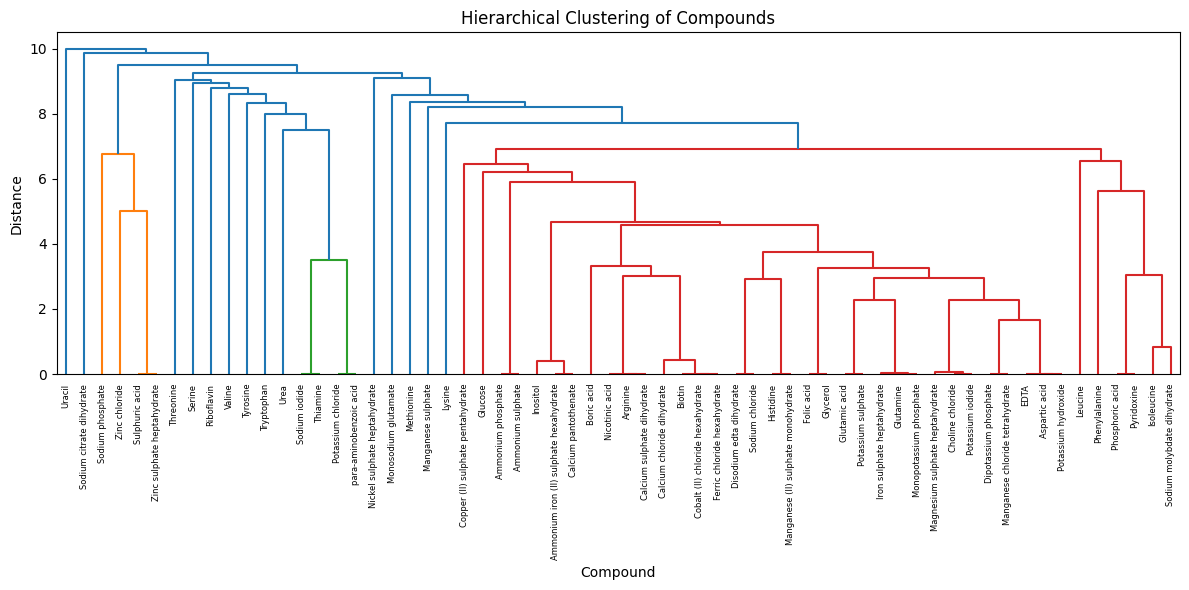

In [66]:
linked = linkage(condensed_dist, method='average')

plt.figure(figsize=(12, 6))
dendrogram(linked, labels=distance_matrix_clean.index.tolist(), leaf_rotation=90)
plt.title("Hierarchical Clustering of Compounds")
plt.xlabel("Compound")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()
